# First Computational Steps
This Notebook shows

    * how to rotate objects, using the package *scikit-kinematics*, and
    * how to implement simulations of linear-time-invariant (LTI) systems with transfer functions.

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import skinematics as skin      # for the section on rotations
from scipy import signal        # for the section on LTI-systems

%matplotlib inline

## Rotations

### Generate dummy head movements

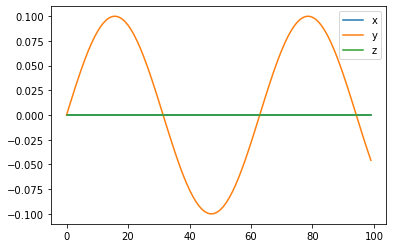

In [1]:
t = np.arange(0, 10, 0.1)
gyr = np.vstack((np.zeros_like(t), 0.1*np.sin(t), np.zeros_like(t)) ).T
plt.plot(gyr)
plt.legend(['x', 'y', 'z'])

### Rotate the sensor 5 deg clockwise

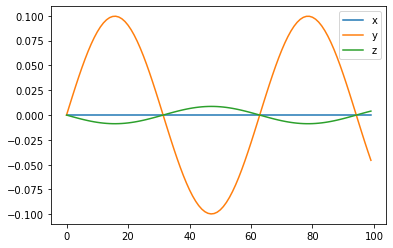

In [3]:
Rmat = skin.rotmat.R('x', -5)
#print(Rmat)

gyrRotated = Rmat.dot(gyr.T).T
# If you are running Python 3.5, you can instead write
# gyrRotated = (Rmat @ gyr.T).T

plt.plot(gyrRotated)
plt.legend(['x', 'y', 'z'])

#### Implemented as Matrices

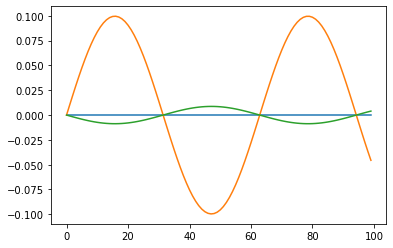

In [4]:
R = np.matrix(Rmat)
omega = np.matrix(gyr)
rotated = (R * gyr.T).T
plt.plot(rotated)

#### Rotation with quaterions

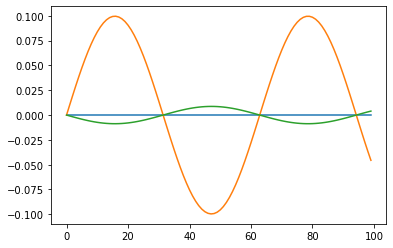

In [5]:
q = [-np.sin(np.deg2rad(5)/2), 0, 0]
rotated = skin.vector.rotate_vector(gyr, q)
plt.plot(rotated)
    

## Linear Systems Demo

Simple examples for simulating responses of *Linear-Time-Invariant (LTI)-Systems*.

### Define Transfer Function, and Generate Input
Assume we want to simulate the following system:

<img src="data/images/Lowpass.png">

(The system is shown in the MATLAB-Simulink format.)

In [6]:
# Define transfer function
tau = 7
num = [1]
den = [tau, 1]
tf = signal.lti(num, den)

# Generate inSignal
t = np.arange(0, 30, 0.1)
in_signal = np.zeros(t.size)
in_signal[t>=5] = 1

### Simulate System Response

Text(0.5, 0, 'Time [sec]')

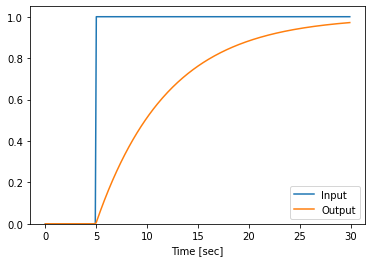

In [7]:
# Simulate and plot outSignal (often the "state_vector" is not needed)
t_out, out_signal, state_vector = signal.lsim(tf, in_signal, t)

# Plot input and output
plt.plot(t, in_signal, label='Input')
plt.plot(t_out, out_signal, label='Output')
plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.xlabel('Time [sec]')

<img src="data/images/Forward.png"> [Vestibular_2_Stimulus.ipynb](Vestibular_2_Stimulus.ipynb)

    Author: Thomas Haslwanter
    Date: Feb 17, 2023

<img src="data/images/CCA_40.png">

*The Vestibular System*  is licensed under a Creative Commons Attribution 4.0 International License.